<h1>Neural Network Model</h1>
<h3>Predicting image class by feeding it to dense layers created using Neural Network structure.

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

<h1>Importing the dataset</h1>
We will use the MNIST Fashion Dataset. This is a dataset that is included in keras.
This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [25]:
fashion_mnist = keras.datasets.fashion_mnist
# split into tetsing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

<h4>Checking image size

In [26]:
train_images.shape
train_images[0,23,23]  # let's have a look at one pixel

194

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).
Our pixel values are between 0 and 255, 0 being black and 255 being white.

<h3>All class we have in dataset

In [27]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

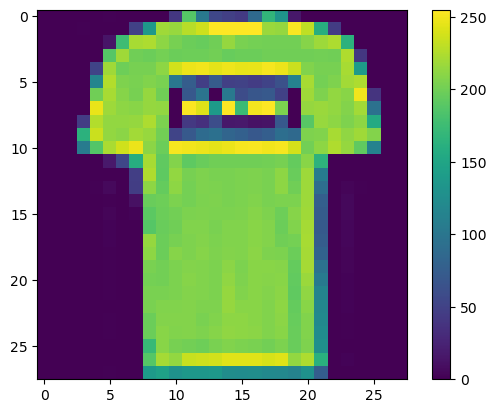

In [29]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

<h1>Data Preprocessing</h1>
Applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0

<h1>Building the Model

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

<h1>Compile the Model

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h1>Training the Model

In [33]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5028 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3757 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3385 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3146 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2964 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2817 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2592 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2486 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.241

<h1>Evaluating the Model

In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8840
Test accuracy: 0.8840000033378601


We can clearly see that our model is showing overfitting condition. So, we can do some changes or tuning in our model training like changing <b>epocs</b> or changing <b>dense layers<b>.

<h1>Making Predictions

In [35]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
[1.0379149e-06 6.1757632e-08 6.6298362e-08 1.8588000e-09 1.5001389e-07
 2.3421707e-02 1.4543872e-06 5.0003249e-02 2.6769555e-07 9.2657185e-01]
9


Ankle boot


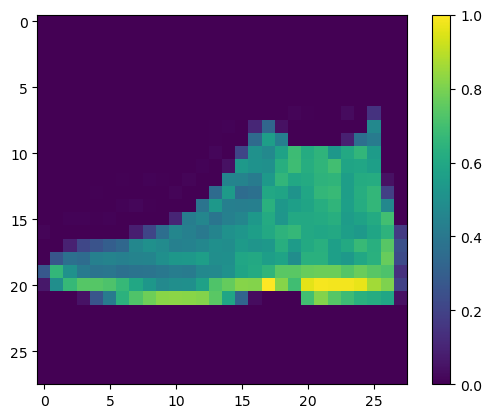

In [36]:
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<h1>Result</h1>
We found that the model is predicting correct article for a particular image feeded.